开始训练...
Epoch 0, Accuracy：0.39375
Epoch 0, Loss：0.25751277192976435
Epoch 100, Accuracy：0.50625
Epoch 100, Loss：0.7776825335269243
Epoch 200, Accuracy：0.46875
Epoch 200, Loss：1.288989246864705
Epoch 300, Accuracy：0.48125
Epoch 300, Loss：0.63385794989308
Epoch 400, Accuracy：0.4083333333333333
Epoch 400, Loss：0.5181602864759217
Epoch 500, Accuracy：0.51875
Epoch 500, Loss：1.0941882877190925
Epoch 600, Accuracy：0.5166666666666667
Epoch 600, Loss：2.505331484231707
Epoch 700, Accuracy：0.5229166666666667
Epoch 700, Loss：0.4848299000963046
Epoch 800, Accuracy：0.5104166666666666
Epoch 800, Loss：1.0753210239148698
Epoch 900, Accuracy：0.5145833333333333
Epoch 900, Loss：1.1343288145177017
Epoch 1000, Accuracy：0.5020833333333333
Epoch 1000, Loss：0.9033966800718829
Epoch 1100, Accuracy：0.4708333333333333
Epoch 1100, Loss：0.580170173914079
Epoch 1200, Accuracy：0.48333333333333334
Epoch 1200, Loss：2.743201002325963
Epoch 1300, Accuracy：0.47708333333333336
Epoch 1300, Loss：0.525566760526208
Epoch 1400,

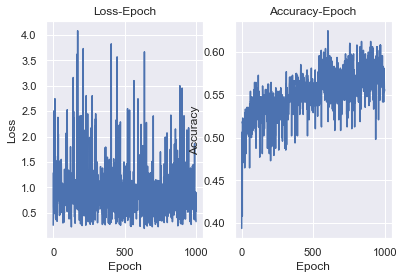

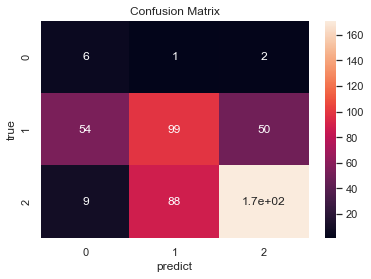

In [13]:
'''
Author: XiangxinZhong
Date: 2021-11-04 11:43:11
LastEditors: XiangxinZhong
LastEditTime: 2021-11-09 10:30:54
Description: ML Lab2 BP Softmax
'''

import time
from numpy.core.arrayprint import _leading_trailing
from numpy.lib.function_base import select
from numpy.lib.type_check import _nan_to_num_dispatcher
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as mtr
from sklearn.model_selection import train_test_split
import seaborn as sns


class BP:

    def __init__(self, input_size, hidden_size, output_size, learning_rate, num):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        # 用来存储最优参数的字典
        self.opt_para = {}
        self.num = num
        # 记录loss
        self.record_loss = []
        # 记录accuracy变化
        self.record_acc = []
        # 输入层-隐藏层 权重
        self.v = np.random.normal(
            0.0, pow(hidden_size, -0.5), (hidden_size, input_size))
        # 输入层-隐藏层 阈值
        self.t1 = np.zeros((hidden_size, 1))
        # 隐藏层-输出层 权重
        self.w = np.random.normal(
            0.0, pow(output_size, -0.5), (output_size, hidden_size))
        # 隐藏层-输出层 阈值
        self.t2 = np.zeros((output_size, 1))
        # 激活函数 sigmoid函数
        self.activator = lambda x: 1.0/(1.0+np.exp(-x))

    '''
    description: softmax
    param {*} self
    param {*} x
    return {*}
    '''

    def softmax(self, x):
        fenzi = np.exp(x)
        fenmu = np.sum(np.exp(x))
        return fenzi/fenmu

    '''
    description: 前向传播，计算每一层的输出 
    param {*} self
    return {*}
    '''

    def forward(self):
        self.hidden_output = self.activator(
            np.dot(self.v, self.sample)-self.t1)
        # 输出层输出
        self.out_output = self.softmax(
            np.dot(self.w, self.hidden_output)-self.t2)

    '''
    description: 反向传播，计算g和e
    param {*} self
    return {*}
    '''

    def backward(self):
        # self.g = self.out_output*(1-self.out_output) * \
        #     (self.label-self.out_output)
        self.g = self.out_output-self.label
        # 输入层-隐藏层
        self.e = self.hidden_output*(
            1-self.hidden_output)*np.dot(self.w.T, self.g)

    '''
    description: 计算梯度
    param {*} self
    return {*}
    '''

    def grad(self):
        # 隐藏层-输出层 权重 阈值
        self.grad_w = np.dot(self.g, self.hidden_output.T)
        self.grad_t2 = self.g
        # 输入层-隐藏层 权重 阈值
        self.grad_v = np.dot(self.e, self.sample.T)
        self.grad_t1 = -self.e

    '''
    description: 更新参数
    param {*} self
    return {*}
    '''

    def update(self):
        # 更新权重和阈值
        self.w -= self.learning_rate*self.grad_w
        self.v -= self.learning_rate*self.grad_v
        self.t1 -= self.learning_rate*self.grad_t1
        self.t2 -= self.learning_rate*self.grad_t2

    '''
    description: 模型训练
    param {*} self
    param {*} sample
    param {*} label
    return {*}
    '''

    def train(self, sample, label):
        # 此处sample只包含1组数据
        self.sample = sample
        self.label = label
        self.forward()
        self.backward()
        self.grad()
        self.update()

    '''
    description: 建立模型
    param {*} self
    param {*} X
    param {*} Y
    param {*} num_iterations
    return {*}
    '''

    def nn_model(self, X, Y,  num_iterations=1000):
        # 默认初始化参数
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(
            X, Y, test_size=0.3)
        self.opt_acc = 0
        X_len = len(self.x_train)
        for i in range(num_iterations):
            idx = np.random.randint(X_len)
            feat = self.x_train[idx].reshape(self.input_size, 1)
            label = self.y_train[idx].reshape(self.output_size, 1)
            self.train(feat, label)
            acc = calAcc(self.x_test.T, self.y_test, self)
            # self.matrix = confusion(self.out_output,self.Y)
            self.record_acc.append(acc)
            loss = -np.sum(self.label*np.log(self.out_output))
            self.record_loss.append(loss)
            if i % 100 == 0:
                print("Epoch {}, Accuracy：{}".format(i, acc))
                print("Epoch {}, Loss：{}".format(i, loss))
            # 更新最优参数
            if (self.opt_acc < acc):
                self.opt_para['w'] = self.w
                self.opt_para['v'] = self.v
                self.opt_para['t1'] = self.t1
                self.opt_para['t2'] = self.t2
                self.opt_acc = acc


def read_iris():
    input_size = 4
    hidden_size = 10
    output_size = 3
    df = pd.read_excel("iris_data2.xlsx")
    X = df.loc[:, 'sepal_length':'petal_width'].values
    Y = df.loc[:, 'class1':'class3'].values
    return input_size, hidden_size, output_size, X, Y


def read_wine():
    input_size = 11
    hidden_size = 50
    output_size = 3
    df = pd.read_excel("winequality_data2.xlsx")
    X = df.loc[:, 'fixed acidity':'alcohol'].values
    Y = df.loc[:, 'class1':'class3'].values
    return input_size, hidden_size, output_size, X, Y


def calAcc(X, Y, bp):
    hidden_output = bp.activator(np.dot(bp.v, X)-bp.t1)
    out_output = bp.softmax(np.dot(bp.w, hidden_output)-bp.t2).T
    out_output = (out_output == out_output.max(axis=1, keepdims=1)).astype(int)
    acc = mtr.accuracy_score(out_output, Y)
    return acc


def drawRes(bp):
    loss = bp.record_loss[0:len(bp.record_loss):100]
    epoches1 = len(loss)
    acc = bp.record_acc[0:len(bp.record_acc):100]
    epoches2 = len(acc)
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(epoches1), loss)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss-Epoch")
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(epoches2), acc)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy-Epoch")
    plt.subplots_adjust(left=0.1, bottom=None, right=0.9, top=None,
                        wspace=None, hspace=None)
    plt.show()


def confusion(y_true, y_pred):
    sns.set()
    f, ax = plt.subplots()
    y1 = np.argmax(y_true, axis=1).flatten()  # y_true
    y2 = np.argmax(y_pred, axis=1).flatten()  # y_pred
    C2 = mtr.confusion_matrix(y1, y2, labels=[0, 1, 2])
    sns.heatmap(C2, annot=True, ax=ax)  # 画热力图
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("predict")
    ax.set_ylabel("true")
    plt.show()


if __name__ == "__main__":
    input_size, hidden_size, output_size, X, Y = read_wine()
    learning_rate = 0.001
    num_iterations = 10000
    bp = BP(input_size, hidden_size, output_size, learning_rate, 1500)
    print("开始训练...")
    times_start = time.time()
    bp.nn_model(X, Y, num_iterations)
    time_end = time.time()
    latch = time_end - times_start
    print('\n')
    print("耗时: {}s，训练结束".format(latch))
    print("Accuracy: {}".format(bp.opt_acc))
    drawRes(bp)
    # x_train, x_test, y_train, y_test = train_test_split(
    #     X, Y, test_size=0.3)
    hidden_output = bp.activator(
        np.dot(bp.opt_para['v'], bp.x_test.T)-bp.opt_para['t1'])
    out_output = bp.softmax(
        np.dot(bp.opt_para['w'], hidden_output)-bp.opt_para['t2']).T
    out_output = (out_output == out_output.max(axis=1, keepdims=1)).astype(int)
    print("Test Accuracy: {}".format(mtr.accuracy_score(out_output, bp.y_test)))
    confusion(out_output, bp.y_test)
